In [81]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections
import numpy.fft as fft

In [224]:
### VALEURS CONSTANTES
nCell = 1000
##constantes
n = 2
alpha = 216
kappa = 20
k_s0 = 1
k_s1 = 0.01
t = 600
eta = 2.0
Q = 0.8
beta = []
for i in range(nCell):
    beta.append(random.gauss(1,0.05))
tau = 0.3 ##a voir

# EULER EXPLICITE

In [93]:
### Initialisation des matrices
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = random.randint(0,100)
b[:,0] = random.randint(0,100)
c[:,0] = random.randint(0,100)

A[:,0] = random.randint(0,100)
B[:,0] = random.randint(0,100)
C[:,0] = random.randint(0,100)

S[:,0] = random.randint(0,100)
Se[:,0] = random.randint(0,100)

time = np.arange(0,t)

In [94]:
### Calcul des valeurs
for j in range(0, t-1):
    for i in range(0, nCell):
        a[i,j+1] = a[i,j] + tau *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        b[i,j+1] = b[i,j] + tau *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        c[i,j+1] = c[i,j] + tau *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        A[i,j+1] = A[i,j]+ tau*(beta[i]*(a[i,j]-A[i,j]))
        B[i,j+1] = B[i,j]+ tau*(beta[i]*(b[i,j]-B[i,j]))
        C[i,j+1] = C[i,j]+ tau*(beta[i]*(c[i,j]-C[i,j]))
        
        Se[i,j] = Q*np.mean(S[:,j])
        
        S[i,j+1] = S[i,j]+tau*((-k_s0*S[i,j])+(k_s1*A[i,j])-(eta*(S[i,j]-Se[i,j])))

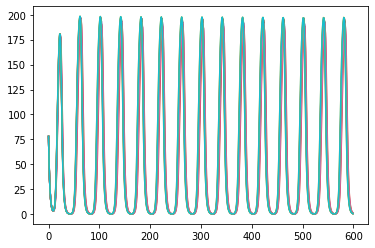

In [95]:
### Plot de b 
cellToPlot = [random.randint(0, 1000) for p in range(0, 10)]

for i in cellToPlot:
    plt.plot(time,b[i])

In [96]:
### Calcul des fréquences
tot_freq=[]
for i in range(nCell):
    peaks, _ = find_peaks(b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 :
            period = peaks[n+1]-peaks[n]
            periods.append(period)
            freq = 1/period
            freq = round(freq,5)
            freqs.append(freq)
        else:
            break
        n+=1
    tot_freq.append(np.mean(freqs))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  57., 927.,  16.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.02  , 0.0202, 0.0204, 0.0206, 0.0208, 0.021 , 0.0212, 0.0214,
        0.0216, 0.0218, 0.022 , 0.0222, 0.0224, 0.0226, 0.0228, 0.023 ,
        0.0232, 0.0234, 0.0236, 0.0238, 0.024 , 0.0242, 0.0244, 0.0246,
        0.0248, 0.025 , 0.0252, 0.0254, 0.0256, 0.0258, 0.026 , 0.0262,
        0.0264, 0.0266, 0.0268, 0.027 , 0.0272, 0.0274, 0.0276, 0.0278,
        0.028 , 0.0282, 0.0284, 0.0286, 0.0288, 0.029 , 0.0292, 0.0294,
        0.0296, 0.0298, 0.03  ]),
 <a list of 50 Patch objects>)

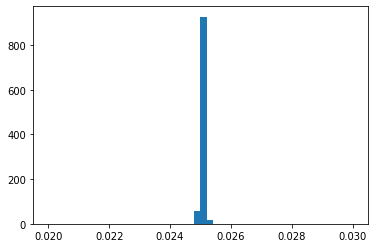

In [97]:
### Plot des fréquences
plt.hist(tot_freq, bins = 50, range =(0.02,0.03))

# RANGE KUTA

In [145]:
### Initialisation des matrices
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = random.randint(0,100)
b[:,0] = random.randint(0,100)
c[:,0] = random.randint(0,100)

A[:,0] = random.randint(0,100)
B[:,0] = random.randint(0,100)
C[:,0] = random.randint(0,100)

S[:,0] = random.randint(0,100)
Se[:,0] = random.randint(0,100)

In [146]:
### Calcul des valeurs
for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

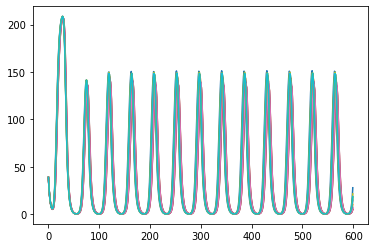

In [147]:
### Plot de b
cellToPlot = [random.randint(0, nCell) for p in range(0, 10)]

for i in cellToPlot:
    plt.plot(time,b[i])

In [148]:
### Calcul des fréquences
tot_freq=[]
for i in range(nCell):
    peaks, _ = find_peaks(b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 :
            period = peaks[n+1]-peaks[n]
            periods.append(period)
            freq = 1/period
            freq = round(freq,5)
            freqs.append(freq)
        else:
            break
        n+=1
    tot_freq.append(np.mean(freqs))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
        889., 109.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.02  , 0.0202, 0.0204, 0.0206, 0.0208, 0.021 , 0.0212, 0.0214,
        0.0216, 0.0218, 0.022 , 0.0222, 0.0224, 0.0226, 0.0228, 0.023 ,
        0.0232, 0.0234, 0.0236, 0.0238, 0.024 , 0.0242, 0.0244, 0.0246,
        0.0248, 0.025 , 0.0252, 0.0254, 0.0256, 0.0258, 0.026 , 0.0262,
        0.0264, 0.0266, 0.0268, 0.027 , 0.0272, 0.0274, 0.0276, 0.0278,
        0.028 , 0.0282, 0.0284, 0.0286, 0.0288, 0.029 , 0.0292, 0.0294,
        0.0296, 0.0298, 0.03  ]),
 <a list of 50 Patch objects>)

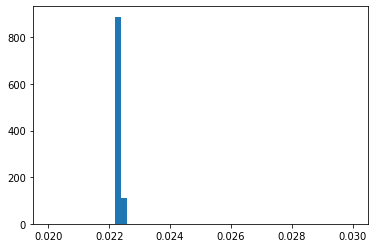

In [149]:
### Plot des fréquences
plt.hist(tot_freq, bins = 50, range =(0.02,0.03))

# EULER IMPLICITE

In [ ]:
### Initialisation des matrices
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = random.randint(0,100)
b[:,0] = random.randint(0,100)
c[:,0] = random.randint(0,100)

A[:,0] = random.randint(0,100)
B[:,0] = random.randint(0,100)
C[:,0] = random.randint(0,100)

S[:,0] = random.randint(0,100)
Se[:,0] = random.randint(0,100)

In [ ]:
### Calcul des valeurs

for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        a[i,j+1] = a[i,j] + tau *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        b[i,j+1] = b[i,j] + tau *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        c[i,j+1] = c[i,j] + tau *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        A[i,j+1] = A[i,j] + tau*(beta[i]*(a[i,j]-A[i,j]))
        B[i,j+1] = B[i,j] + tau*(beta[i]*(b[i,j]-B[i,j]))
        C[i,j+1] = C[i,j] + tau*(beta[i]*(c[i,j]-C[i,j]))

        S[i,j+1] = S[i,j] + tau*((-k_s0*S[i,j])+(k_s1*A[i,j])-(eta*(S[i,j]-Se[i,j])))

        a[i,j] = a[i,j+1] - tau *(-a[i,j+1]+(alpha/(1+C[i,j+1]**n)))
        b[i,j] = b[i,j+1] - tau *(-b[i,j+1]+(alpha/(1+A[i,j+1]**n)))
        c[i,j] = c[i,j+1] - tau *(-c[i,j+1]+(alpha/(1+B[i,j+1]**n))+(kappa*S[i,j+1]/1+S[i,j+1]))

        A[i,j] = A[i,j+1] - tau*(beta[i]*(a[i,j+1]-A[i,j+1]))
        B[i,j] = B[i,j+1] - tau*(beta[i]*(b[i,j+1]-B[i,j+1]))
        C[i,j] = C[i,j+1] - tau*(beta[i]*(c[i,j+1]-C[i,j+1]))

        S[i,j] = S[i,j+1] - tau*((-k_s0*S[i,j+1])+(k_s1*A[i,j+1])-(eta*(S[i,j+1]-Se[i,j+1])))

In [ ]:
### Plot de b
cellToPlot = [random.randint(0, nCell) for p in range(0, 10)]

for i in cellToPlot:
    plt.plot(time,b[i])

In [ ]:
### Calcul des fréquences
tot_freq=[]
for i in range(nCell):
    peaks, _ = find_peaks(b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 :
            period = peaks[n+1]-peaks[n]
            periods.append(period)
            freq = 1/period
            freq = round(freq,5)
            freqs.append(freq)
        else:
            break
        n+=1
    tot_freq.append(np.mean(freqs))

In [ ]:
### Plot des fréquences
plt.hist(tot_freq, bins = 50, range =(0.02,0.03))

# ANALYZE 

In [219]:
def M(t, b, nCell):
    return 1/nCell * sum(b[0:nCell,t])

In [231]:
def R(t, b, nCell):
    M_values = []
    b_values = []
    for t in range(0, t):
        M_values.append(M(t, b, nCell))

    for i in range(0, nCell):
        b_values.append(np.std(b[i,:]))
    return np.std(M_values) / np.mean(b_values)

In [256]:
nCell = 10
##constantes
n = 2
alpha = 216
kappa = 20
k_s0 = 1
k_s1 = 0.01
t = 600
eta = 2.0
tau = 0.3 ##a voir

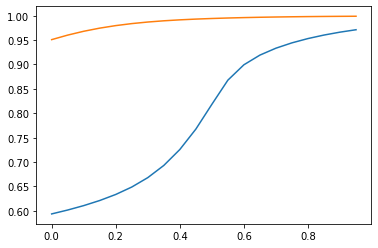

In [252]:
for deltaB in [0.05, 0.01]:
    Q_values = []
    R_values = []
    beta = []
    for i in range(nCell):
        beta.append(random.gauss(1,deltaB))
    for Q in np.arange(0, 1, 0.05):
        ### Initialisation des matrices
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        a[:,0] = 0
        b[:,0] = 0
        c[:,0] = 0

        A[:,0] = 0
        B[:,0] = 0
        C[:,0] = 0

        S[:,0] = 0
        Se[:,0] = 0

        ### Calcul des valeurs
        for j in range(0, t-1):
            for i in range(0, nCell):
                a[i,j+1] = a[i,j] + tau *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                b[i,j+1] = b[i,j] + tau *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                c[i,j+1] = c[i,j] + tau *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

                A[i,j+1] = A[i,j]+ tau*(beta[i]*(a[i,j]-A[i,j]))
                B[i,j+1] = B[i,j]+ tau*(beta[i]*(b[i,j]-B[i,j]))
                C[i,j+1] = C[i,j]+ tau*(beta[i]*(c[i,j]-C[i,j]))

                Se[i,j] = Q*np.mean(S[:,j])

                S[i,j+1] = S[i,j]+tau*((-k_s0*S[i,j])+(k_s1*A[i,j])-(eta*(S[i,j]-Se[i,j])))
                
        Q_values.append(Q)
        R_values.append(R(t, b, nCell))
    plt.plot(Q_values, R_values)


/Users/Elodie/miniconda/envs/env4ml/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in double_scalars


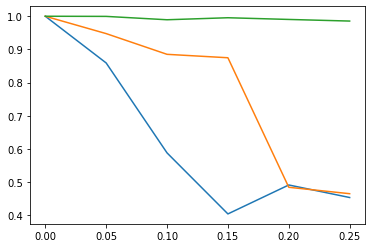

In [258]:
for Q, eta in (0.5, 2), (0.8, 2), (1, 10):
    deltaB_values = []
    R_values = []

    for deltaB in np.arange(0, 0.3, 0.05):

        beta = []
        for i in range(nCell):
            beta.append(random.gauss(1, deltaB))

        ### Initialisation des matrices
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        a[:,0] = random.randint(0,100)
        b[:,0] = random.randint(0,100)
        c[:,0] = random.randint(0,100)

        A[:,0] = random.randint(0,100)
        B[:,0] = random.randint(0,100)
        C[:,0] = random.randint(0,100)

        S[:,0] = random.randint(0,100)
        Se[:,0] = random.randint(0,100)

        ### Calcul des valeurs
        for j in range(0, t-1):
            for i in range(0, nCell):
                a[i,j+1] = a[i,j] + tau *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                b[i,j+1] = b[i,j] + tau *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                c[i,j+1] = c[i,j] + tau *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

                A[i,j+1] = A[i,j]+ tau*(beta[i]*(a[i,j]-A[i,j]))
                B[i,j+1] = B[i,j]+ tau*(beta[i]*(b[i,j]-B[i,j]))
                C[i,j+1] = C[i,j]+ tau*(beta[i]*(c[i,j]-C[i,j]))

                Se[i,j] = Q*np.mean(S[:,j])

                S[i,j+1] = S[i,j]+tau*((-k_s0*S[i,j])+(k_s1*A[i,j])-(eta*(S[i,j]-Se[i,j])))

        deltaB_values.append(deltaB)
        R_values.append(R(t, b, nCell))
    plt.plot(deltaB_values, R_values)